In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# イジングモデルの認識

$$\frac{Tc}{J} = \frac{2}{\log{(1 + \sqrt{2})}}$$
$J=1$で固定した。

In [2]:
Tc = 2 / np.log(1 + np.sqrt(2))
Tc

2.2691853142130221

# $Tc < T$のデータ(ラベル -1)を`Data0`に代入

In [3]:
Data0 = pd.read_csv("isingModel_data_0.csv")
Data0.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,-1,1,1,1,1,1,1,-1,-1,1,...,1,1,1,-1,-1,1,1,1,-1,0
1,-1,-1,-1,-1,1,1,1,-1,1,1,...,1,1,1,1,1,1,1,-1,-1,0
2,1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,1,1,1,1,1,0
3,1,1,-1,-1,-1,-1,-1,-1,1,1,...,1,1,1,1,-1,-1,-1,-1,1,0
4,1,1,1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,1,0


In [4]:
Data0.shape

(3000, 2501)

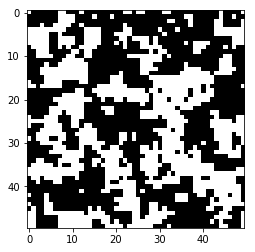

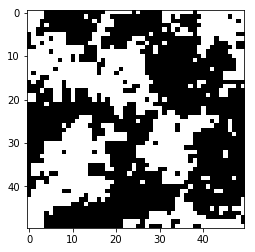

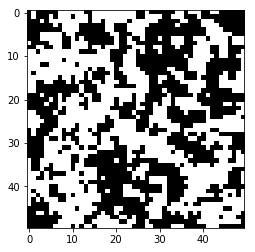

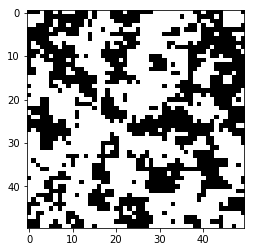

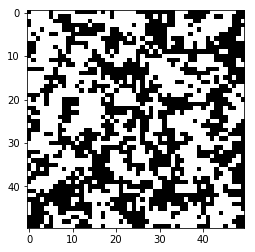

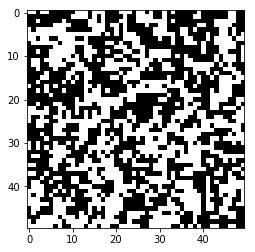

In [5]:
# plot
from itertools import product

size=50
"""
fig, ax = plt.subplots(3, 2, figsize=(20, 10))
for idx, i in zip(product([0,1,2], [0,1]), [0, 100, 300, 500, 1500, 2900]):
    ax[idx[0], idx[1]].imshow(Data1.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
"""
for i in [0, 100, 300, 500, 1500, 2900]:
    plt.imshow(Data0.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# $Tc > T$のデータ(ラベル 1)を`Data1`に代入

In [6]:
Data1 =  pd.read_csv("isingModel_data_1.csv")
Data1.head()

,0,1,2,3,4,5,6,7,8,9,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,label
0,1,1,1,1,1,1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
1,-1,-1,-1,-1,-1,-1,1,1,1,1,...,-1,-1,-1,-1,-1,-1,-1,1,-1,1
2,1,1,1,1,1,-1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1
3,-1,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,1
4,1,1,1,1,1,1,-1,-1,-1,-1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
Data1.shape

(3000, 2501)

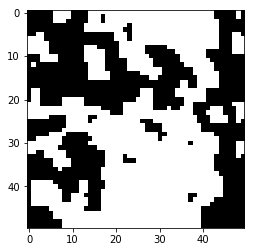

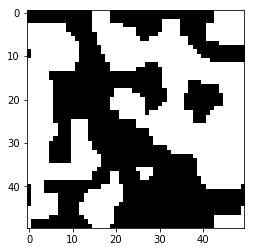

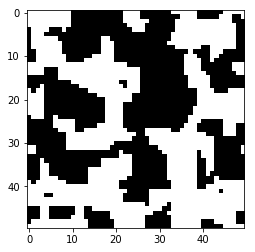

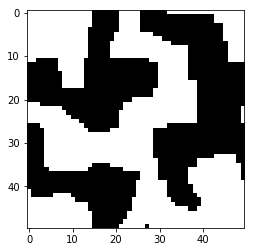

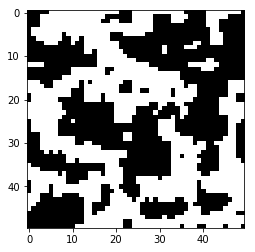

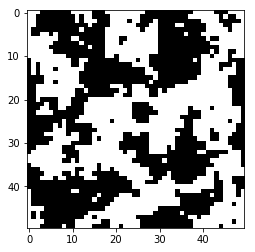

In [8]:
#plot

size=50
for i in [0, 100, 300, 500, 1500, 2900]:
    plt.imshow(Data1.iloc[i, :-1].values.reshape(size, size), vmin=-1, vmax=1,
                         cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

# データ行列 $\boldsymbol{X}$ とラベル $\boldsymbol{y}$ を作成

In [9]:
X = pd.concat([Data0.iloc[ :,:-1], Data1.iloc[ :,:-1]], ignore_index=True)
X

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
0,-1,1,1,1,1,1,1,-1,-1,1,...,1,1,1,1,-1,-1,1,1,1,-1
1,-1,-1,-1,-1,1,1,1,-1,1,1,...,1,1,1,1,1,1,1,1,-1,-1
2,1,1,1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,1,1,1
3,1,1,-1,-1,-1,-1,-1,-1,1,1,...,1,1,1,1,1,-1,-1,-1,-1,1
4,1,1,1,-1,-1,1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
5,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,1,1,1,1,1,1,1
6,-1,-1,1,1,1,1,-1,1,-1,1,...,1,1,-1,-1,-1,-1,-1,-1,1,1
7,-1,1,1,1,1,1,1,1,1,-1,...,1,1,-1,-1,1,1,-1,-1,1,1
8,1,1,1,-1,1,-1,-1,1,-1,1,...,1,1,1,1,1,-1,-1,1,1,1
9,1,1,-1,-1,-1,-1,-1,1,1,1,...,1,1,1,-1,-1,-1,-1,1,1,1


In [11]:
y = pd.concat([Data0.iloc[:,-1], Data1.iloc[:,-1]], ignore_index=True)
y

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
5970    1
5971    1
5972    1
5973    1
5974    1
5975    1
5976    1
5977    1
5978    1
5979    1
5980    1
5981    1
5982    1
5983    1
5984    1
5985    1
5986    1
5987    1
5988    1
5989    1
5990    1
5991    1
5992    1
5993    1
5994    1
5995    1
5996    1
5997    1
5998    1
5999    1
Name: label, Length: 6000, dtype: int64

In [12]:
np.bincount(y)

array([3000, 3000], dtype=int64)

# テストデータと学習データに分割

In [19]:
from sklearn.model_selection import train_test_split

# テストデータサイズは全体の３割 
# 層化を行いクラスごとのデータ数の偏りをなくす
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.3, random_state=0,
                                                    stratify=y, shuffle=True)

print(np.unique(y_train, return_counts=True)[1] / y_train.size)
print(np.unique(y_test, return_counts=True)[1] / y_test.size)

[ 0.49941133  0.50058867]
[ 0.5  0.5]


# グリッドサーチ

__前処理__
 - 白色化PCA
 - PCA
 - 標準化
 - 線形判別分析(LDA)
 - 白色化ZCA (<- まだ実装していないのでだめ)
 
__MLPパラメータ__ (隠れ層 1つ, 隠れ素子 3つ)
 - 正則化係数
 - 活性化関数

In [16]:
from sklean

(array([-1,  1], dtype=int64), array([1878313, 1871687], dtype=int64))

# MLP( Neural Network) で識別

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier() 

# やってみたいこと

[重みの視覚化 Visualization of MLP weights on MNIST](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)